In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies_df=pd.read_csv('movies.csv')
ratings_df=pd.read_csv('ratings.csv')
links_df=pd.read_csv('links.csv')
tags_df=pd.read_csv('tags.csv')

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
unique_userId=ratings_df['userId'].nunique()

In [7]:
unique_userId

610

In [8]:
rating_counts = ratings_df.groupby('movieId').size()

most_rated_movie_id = rating_counts.idxmax()
most_rated_movie_count = rating_counts.max()

print(f"Movie ID with the maximum number of ratings: {most_rated_movie_id}")
print(f"Number of ratings: {most_rated_movie_count}")


most_rated_movie = movies_df[movies_df['movieId'] == most_rated_movie_id]['title'].values[0]

print(f"Title of the movie with the maximum number of ratings: {most_rated_movie}")

Movie ID with the maximum number of ratings: 356
Number of ratings: 329
Title of the movie with the maximum number of ratings: Forrest Gump (1994)


In [11]:
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

print(f"Tags for 'Matrix, The (1999)':")
print(matrix_tags[['tag']])

Tags for 'Matrix, The (1999)':
                     tag
815         martial arts
816               sci-fi
1646  alternate universe
2794          philosophy
2795    post apocalyptic


In [12]:
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]

average_rating = terminator_ratings['rating'].mean()

print(f"Average rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average rating for 'Terminator 2: Judgment Day (1991)': 3.97


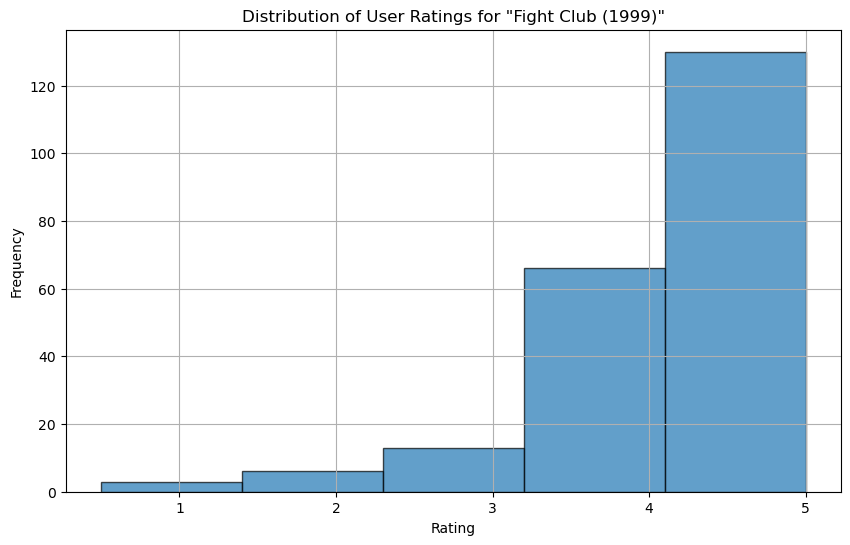

In [13]:
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

### So from the above Graph it's very clear the distribution is left skewed

In [15]:
rating_agg = ratings_df.groupby('movieId').agg(rating_count=('rating', 'size'), avg_rating=('rating', 'mean')).reset_index()

movies_with_ratings = pd.merge(movies_df, rating_agg, on='movieId')

filtered_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]

print(filtered_movies)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  avg_rating  
0     Adventure|Animation|Children|Comedy|Fantasy           215    3.920930  
1                      Adventure|Children|Fantasy           110    3.431818  
2                                  Comedy|Romance            52    3.259615  
5                           Action|Crime|Thriller           102    3.946078

In [17]:
most_popular_movie = filtered_movies.sort_values(by='avg_rating', ascending=False).iloc[0]

most_popular_movie_title = most_popular_movie['title']
most_popular_movie_avg_rating = most_popular_movie['avg_rating']

print(f"Most popular movie based on average user ratings: {most_popular_movie_title}")

Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [19]:
top_rated_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

top_5_movies = top_rated_movies[['title', 'rating_count']]

print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies)

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [21]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False)]

sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2]

third_most_popular_sci_fi_title = third_most_popular_sci_fi['title']
third_most_popular_sci_fi_rating_count = third_most_popular_sci_fi['rating_count']

print(f"The third most popular Sci-Fi movie based on number of user ratings: {third_most_popular_sci_fi_title}")
print(f"Number of ratings: {third_most_popular_sci_fi_rating_count}")

The third most popular Sci-Fi movie based on number of user ratings: Jurassic Park (1993)
Number of ratings: 238


In [23]:
movies_with_links = pd.merge(filtered_movies, links_df, on='movieId')

print(movies_with_links[['title', 'imdbId']].head())

                     title  imdbId
0         Toy Story (1995)  114709
1           Jumanji (1995)  113497
2  Grumpier Old Men (1995)  113228
3              Heat (1995)  113277
4           Sabrina (1995)  114319


In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_imdb_reviews(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/reviews"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve reviews for {imdb_id}")
        return None
    
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = []
    
    review_containers = soup.find_all('div', class_='text show-more__control')
    for container in review_containers:
        review_text = container.get_text(strip=True)
        reviews.append(review_text)

    return reviews

all_reviews = {}
for _, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    reviews = scrape_imdb_reviews(imdb_id)
    if reviews:
        all_reviews[row['title']] = reviews
    time.sleep(2)

import json

with open('imdb_reviews.json', 'w') as f:
    json.dump(all_reviews, f, indent=4)

Failed to retrieve reviews for 114709
Failed to retrieve reviews for 113497
Failed to retrieve reviews for 113228
Failed to retrieve reviews for 113277
Failed to retrieve reviews for 114319
Failed to retrieve reviews for 113189
Failed to retrieve reviews for 112346
